In [59]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity


**Loading Training Dataset and Testing Dataset**(And seeing there info)

In [60]:

# Load the datasets
train_df = pd.read_csv('basket_data_by_date_train.csv')
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      40000 non-null  int64  
 1   Itemname    40000 non-null  object 
 2   Quantity    40000 non-null  int64  
 3   Date        40000 non-null  object 
 4   Price       40000 non-null  float64
 5   CustomerID  40000 non-null  int64  
 6   cost        40000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB
None


,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30


In [61]:
test_df = pd.read_csv('basket_data_by_date_test.csv')
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      10000 non-null  float64
 1   Itemname    10000 non-null  object 
 2   Quantity    10000 non-null  float64
 3   Date        10000 non-null  object 
 4   Price       10000 non-null  float64
 5   CustomerID  10000 non-null  float64
 6   cost        10000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.1+ MB
None


,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,544398.0,JUMBO SHOPPER VINTAGE RED PAISLEY,1.0,18/02/2011 12:27,1.95,15311.0,1.95
1,544398.0,ZINC WILLIE WINKIE CANDLE STICK,4.0,18/02/2011 12:27,0.85,15311.0,3.40
2,544398.0,LOVE BUILDING BLOCK WORD,2.0,18/02/2011 12:27,5.95,15311.0,11.90
3,544398.0,HANGING FAIRY CAKE DECORATION,3.0,18/02/2011 12:27,2.10,15311.0,6.30
4,544398.0,RED HEART SHAPE LOVE BUCKET,1.0,18/02/2011 12:27,2.95,15311.0,2.95


**NullValues:**

Null values, also known as missing values, are placeholders in data that indicate the absence of a value. They can occur for various reasons, such as data entry errors, equipment malfunction, or incomplete data collection. Null values can have a significant impact on data analysis and machine learning algorithms because they can distort statistical measures, affect visualization, and lead to biased results if not handled properly.


In [62]:
# Check for null values in the training data
print("Null values in Training Data:")
print(train_df.isnull().sum())

Null values in Training Data:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64


In [63]:
# Check for null values in the training data
print("Null values in Training Data:")
print(test_df.isnull().sum())

Null values in Training Data:
BillNo        30000
Itemname      30000
Quantity      30000
Date          30000
Price         30000
CustomerID    30000
cost          30000
dtype: int64


In [84]:
# Drop rows where any cell is null
test_df = test_df.dropna()
# Check for null values in the training data
print("Null values in Training Data:")
print(test_df.isnull().sum())

Null values in Training Data:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64


A bar plot to visualize the top 10 most bought products based on the total quantity sold. This analysis helps in understanding which products are the most popular or in-demand among customers. By examining the top-selling products, businesses can gain insights into customer preferences, identify trends, and make data-driven decisions related to inventory management, marketing strategies, and product offerings.

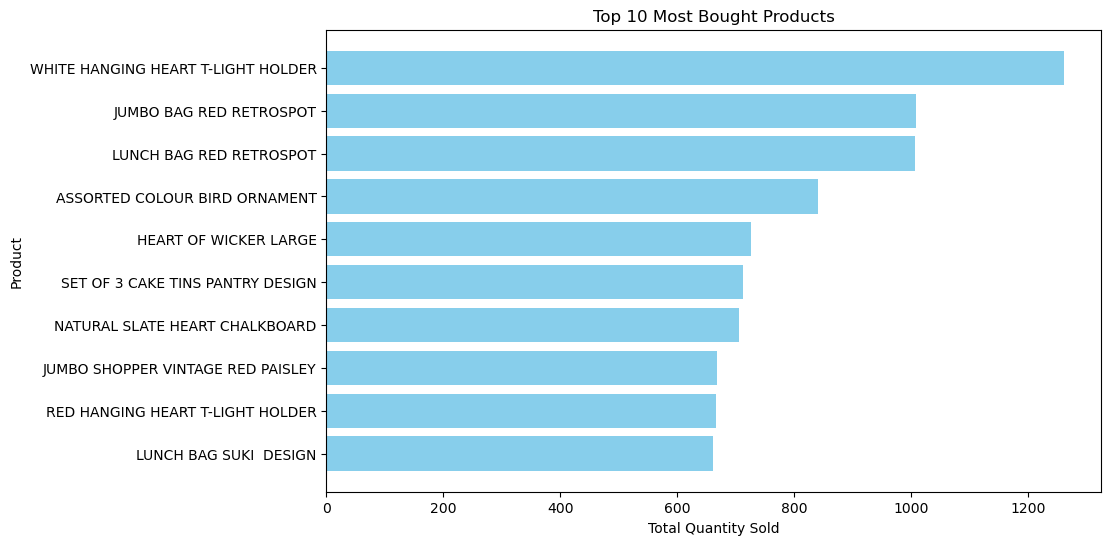

In [65]:
import matplotlib.pyplot as plt


# Group by 'Itemname' and sum the 'Quantity' to get the total quantity sold for each item
product_sales = train_df.groupby('Itemname')['Quantity'].sum().reset_index()

# Sort the products based on their total quantity sold
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Plot the top N most bought products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Itemname'], top_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Most Bought Products')
plt.gca().invert_yaxis()  # Invert y-axis to display the most bought product at the top
plt.show()

Analize customer activity data to identify the top 10 customers who purchased the highest quantity of products. It's a common task in sales analysis to understand customer behavior and identify key customers for targeted marketing or personalized services.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with provided data
customer_activity = train_df.groupby('CustomerID')['Quantity'].sum().reset_index()

# Sort the customer IDs based on their total quantity purchased
top_customers = customer_activity.sort_values(by='Quantity', ascending=False).head(10)
print(top_customers)


      CustomerID  Quantity
1290       17850      1553
695        15311      1435
113        12748      1230
1286       17841      1127
630        15039      1036
533        14606       998
188        13089       714
403        14085       663
804        15808       634
219        13174       630


**Data Representation:** Pivot tables provide a structured representation of user-item interactions, where rows represent users, columns represent items, and the values represent user-item interactions (e.g., quantity purchased). This structured format simplifies the process of organizing and processing the data for collaborative filtering.


In [67]:
# Create pivot tables and convert to sparse CSR matrix for user-based collaborative filtering
user_matrix = train_df.pivot_table(index='CustomerID', columns='Itemname', values='Quantity', aggfunc='sum', fill_value=0)

user_matrix.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Sparse Representation:** In recommendation systems, user-item interaction matrices are often sparse, meaning that most entries are zero (indicating no interaction). Sparse matrices are memory-efficient because they only store non-zero elements, reducing memory consumption and speeding up computations. Converting pivot tables to sparse matrices, such as the CSR format, helps in efficiently handling large datasets with many zero entries

In [68]:
user_sparse_matrix = csr_matrix(train_matrix.values.astype(float))

**Item-Based Collaborative Filtering:** In contrast to user-based collaborative filtering, item-based collaborative filtering recommends items to users based on the similarity between items rather than between users. This approach is often preferred in scenarios where the number of items is smaller than the number of users, which is common in many recommendation systems.

In [69]:
# Transpose for item-based
item_matrix = train_df.pivot_table(index='Itemname', columns='CustomerID', values='Quantity', aggfunc='sum', fill_value=0)
item_matrix.head()

CustomerID,12347,12350,12352,12356,12362,12370,12373,12377,12383,12386,...,18230,18233,18239,18245,18250,18257,18259,18260,18269,18283
Itemname,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 COLOURED PARTY BALLOONS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 DAISY PEGS IN WOOD BOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 EGG HOUSE PAINTED WOOD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 IVORY ROSE PEG PLACE SETTINGS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
item_sparse_matrix = csr_matrix(item_matrix.values.astype(float))

By printing the shapes of the matrices, you can verify the correctness of the data processing steps and ensure that the data is in the expected format before proceeding with further analysis or modeling tasks.

In [71]:
# Output the shape of the matrices to confirm the structure
print(user_sparse_matrix.shape)
print(item_sparse_matrix.shape)

(1391, 2523)
(2523, 1391)


**Singular Value Decomposition (SVD):**

SVD is a technique used to reduce the dimensionality of the user-item interaction matrix while preserving its essential information. By decomposing the original matrix into three matrices (U, S, and V^T), where U represents user features, S represents singular values, and V^T represents item features, SVD identifies latent factors that capture underlying patterns in the data.

User-item interaction matrices in recommendation systems are often large and sparse, making them computationally expensive to handle. By reducing the dimensionality of the matrix using SVD, we can extract the most significant features or latent factors, effectively reducing the computational complexity of subsequent operations such as similarity computation and recommendation generation. Performing SVD for dimensionality reduction is a crucial step in user-based collaborative filtering recommendation models. It enables efficient computation, improves model performance, and enhances the interpretability of the underlying user-item interactions.

In [72]:
# Perform SVD for dimensionality reduction (user-based)
u, s, vt = svds(user_sparse_matrix, k=50)
user_predicted_ratings = np.dot(np.dot(u, np.diag(s)), vt)


In [73]:
# Perform SVD for dimensionality reduction (item-based)
u_item, s_item, vt_item = svds(item_sparse_matrix, k=50)
item_predicted_ratings = np.dot(np.dot(u_item, np.diag(s_item)), vt_item)

Converting the predicted ratings back to a DataFrame format enhances the usability, compatibility, and interpretability of the predicted ratings data, making it easier to analyze and utilize in the recommendation system workflow.



In [74]:
# Convert the predicted ratings back to a DataFrame
predicted_ratings_df = pd.DataFrame(user_predicted_ratings, index=user_matrix.index, columns=user_matrix.columns)

predicted_ratings_df.head()


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0.014897,-0.145917,-0.166655,-0.054575,-0.124796,-0.145915,-0.235292,-0.122851,-0.199921,-0.065362,...,-0.016043,0.052055,0.015453,0.023542,0.016707,-0.014931,0.020918,0.230398,-0.005171,0.219876
12350,-0.000096,0.002884,0.006428,0.001267,0.001481,0.004070,0.004097,0.004299,0.011533,0.000776,...,0.000420,0.005584,-0.000051,0.000917,0.000202,0.000481,-0.000565,0.003476,-0.000389,-0.005830
12352,0.001102,-0.092181,0.028402,0.037578,-0.027358,-0.017052,-0.015865,0.009174,0.040370,0.019544,...,-0.004486,-0.013598,-0.001029,0.003887,-0.003628,-0.019916,-0.002124,-0.021930,-0.000782,-0.006727
12356,-0.001181,0.007704,0.002002,0.005808,0.014398,-0.000090,-0.007578,-0.004839,-0.023219,0.007867,...,0.002290,0.000840,-0.001584,-0.000568,-0.000780,-0.003613,-0.002192,0.009577,-0.000891,0.004854
12362,-0.003525,-0.119836,0.008545,0.005795,-0.016216,-0.038390,-0.113777,-0.034334,0.002932,0.003639,...,-0.003074,-0.178470,-0.004246,-0.005210,-0.006788,0.003801,-0.013425,0.232846,-0.011237,0.116362


In [75]:
predicted_item_ratings_df = pd.DataFrame(item_predicted_ratings, index=item_matrix.index, columns=item_matrix.columns)

predicted_item_ratings_df.head()


CustomerID,12347,12350,12352,12356,12362,12370,12373,12377,12383,12386,...,18230,18233,18239,18245,18250,18257,18259,18260,18269,18283
Itemname,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.014897,-0.000096,0.001102,-0.001181,-0.003525,0.000786,0.009102,0.004330,0.003943,-0.000175,...,-0.000278,0.000003,-0.000721,-0.017750,-0.003857,0.013363,0.003444,-0.009068,0.003224,-0.001979
12 COLOURED PARTY BALLOONS,-0.145917,0.002884,-0.092181,0.007704,-0.119836,0.063996,0.286842,-0.207391,0.066118,-0.007218,...,0.006173,-0.000119,0.106427,-0.306803,0.001627,-0.003272,-0.161604,-0.285457,-0.093409,-0.018162
12 DAISY PEGS IN WOOD BOX,-0.166655,0.006428,0.028402,0.002002,0.008545,-0.006628,0.032680,-0.017302,-0.066069,-0.002438,...,-0.003901,-0.000393,-0.011620,0.138991,-0.000428,0.004692,0.010051,0.221871,-0.000021,0.112989
12 EGG HOUSE PAINTED WOOD,-0.054575,0.001267,0.037578,0.005808,0.005795,0.002214,-0.000939,-0.002027,0.000350,-0.000003,...,-0.001108,0.000043,-0.041422,-0.008709,0.033042,0.031474,0.005201,0.024182,0.001678,0.007227
12 IVORY ROSE PEG PLACE SETTINGS,-0.124796,0.001481,-0.027358,0.014398,-0.016216,0.053451,-0.027801,0.195924,0.068016,-0.003295,...,0.015752,0.000205,0.221854,-0.046508,-0.116403,-0.038878,0.066312,0.296716,-0.016930,-0.076696


**Similarity Calculation:** In collaborative filtering recommendation systems, similarity between users (or items) is a crucial component for generating recommendations. The cosine similarity metric is commonly used to measure the similarity between user vectors in a high-dimensional space.

In user-based collaborative filtering, the cosine similarity matrix captures the similarity between pairs of users based on their predicted ratings for items. Users with similar preferences and purchase patterns are expected to have higher cosine similarity scores.

computing the cosine similarity matrix is a fundamental step in user-based collaborative filtering recommendation systems. It facilitates the identification of similar users and plays a crucial role in generating accurate and personalized recommendations for users based on their preferences.

In [76]:
# Compute cosine similarity matrix (user-based)
user_similarity_matrix = cosine_similarity(predicted_ratings_df)
user_similarity_matrix

array([[ 1.        , -0.08337533, -0.01446485, ..., -0.01916536,
         0.20263941,  0.1450111 ],
       [-0.08337533,  1.        ,  0.04533577, ...,  0.00283233,
         0.02567508,  0.18711651],
       [-0.01446485,  0.04533577,  1.        , ...,  0.21088813,
         0.02247718, -0.0157424 ],
       ...,
       [-0.01916536,  0.00283233,  0.21088813, ...,  1.        ,
         0.15889075, -0.01493332],
       [ 0.20263941,  0.02567508,  0.02247718, ...,  0.15889075,
         1.        ,  0.04235922],
       [ 0.1450111 ,  0.18711651, -0.0157424 , ..., -0.01493332,
         0.04235922,  1.        ]])

**Item-Based Collaborative Filtering:** In item-based collaborative filtering, the similarity between items is essential for generating recommendations. The cosine similarity matrix captures the similarity between item to item based on their predicted ratings by users. Items that are highly similar to each other tend to be recommended together.

In [77]:
# Compute cosine similarity matrix (item-based)
item_similarity_matrix = cosine_similarity(predicted_item_ratings_df)
item_similarity_matrix

array([[ 1.        ,  0.00193833, -0.06416234, ...,  0.11112439,
        -0.00440883,  0.07642319],
       [ 0.00193833,  1.        ,  0.25548451, ...,  0.03241921,
         0.04578179,  0.10165705],
       [-0.06416234,  0.25548451,  1.        , ...,  0.06228127,
         0.02076906, -0.0624434 ],
       ...,
       [ 0.11112439,  0.03241921,  0.06228127, ...,  1.        ,
         0.05742107,  0.33284778],
       [-0.00440883,  0.04578179,  0.02076906, ...,  0.05742107,
         1.        ,  0.3180613 ],
       [ 0.07642319,  0.10165705, -0.0624434 , ...,  0.33284778,
         0.3180613 ,  1.        ]])

**Item Based Recomendations**:

We make a function for **item-based recommendation with similarity scores**. It takes a user ID as input and returns a list of recommended items along with their scores based on similarity to items the user has interacted with.

Function named **recommend_items_item_based** that takes a user ID **(user_id)** and an optional parameter for the number of recommendations **(num_recommendations)**.

Then we calculate scores for each item to recommend to the user. we do that by looking at the items the user has interacted with before and comparing them to all other items in the dataset. we calculate how similar each item is to the ones the user has interacted with. This is done by multiplying the similarity scores between items (stored in the item_similarity_matrix) with the user's interaction pattern with items. Then we Select Top Recommendations that Sorts the computed item scores in descending order and selects the top num_recommendations items to recommend to the user and then we return a tuple of recommended items with its score.

In [80]:

# Item-based recommendation function with similarity scores
def recommend_items_item_based(user_id, num_recommendations=5):
    if user_id not in train_matrix.index:
        return []  # Check if the user_id exists in the index of the train_matrix
    user_item_vector = user_matrix.loc[user_id].values  # Correctly accessing the user's item interaction vector
    item_scores = np.dot(item_similarity_matrix, user_item_vector)  # Compute scores for all items based on similarity
    top_items_indices = np.argsort(item_scores)[::-1][:num_recommendations]  # Get indices of top items
    
    # Fetch the top items and their scores
    recommended_items = item_matrix.index[top_items_indices].tolist()
    recommended_scores = item_scores[top_items_indices].tolist()
    
    return list(zip(recommended_items, recommended_scores))


# List of specific user IDs for evaluation

user_ids = [16016, 15747, 13960,14056, 15955]
# more customerIDS  14056, 15955

# Evaluate and print the metrics for each user in the list in tabular form
for user_id in user_ids:
    item_score_pairs = recommend_items_item_based(user_id, 5)
    if item_score_pairs:
        df = pd.DataFrame(item_score_pairs, columns=['Recommended Item', 'Score'])
        print(f"Results for CustomerID {user_id}:")
        print(df)
        print("\n")  # Add a newline for better separation in output
    else:
        print(f"No recommendations available for CustomerID {user_id}\n")


Results for CustomerID 16016:
                      Recommended Item      Score
0       CHRISTMAS CRAFT LITTLE FRIENDS  43.491705
1               6 RIBBONS RUSTIC CHARM  42.598166
2          PACK OF 12 WOODLAND TISSUES  41.693513
3  12 PENCILS SMALL TUBE RED RETROSPOT  41.154755
4        12 PENCIL SMALL TUBE WOODLAND  40.847676


No recommendations available for CustomerID 15747

No recommendations available for CustomerID 13960

No recommendations available for CustomerID 14056

Results for CustomerID 15955:
             Recommended Item      Score
0      CAT BOWL VINTAGE CREAM  14.348463
1  PICNIC BASKET WICKER SMALL  14.326905
2  LARGE ROUND WICKER PLATTER  14.214719
3    DOORSTOP RETROSPOT HEART  14.059328
4      ENAMEL BREAD BIN CREAM  14.006362




**User-Based Recommendation**

The user-based recommendation approach focuses on identifying similar users based on their past interactions or preferences.
This code snippet (recommend_items_user_based) focuses on user-based recommendation. It identifies similar users to the target user based on their past interactions. It aggregates item scores from similar users and recommends items that are popular among those similar users. The recommendations are based on items that similar users have interacted with and liked.

In [81]:
def recommend_items_user_based(user_id, num_recommendations=5):
    if user_id not in predicted_ratings_df.index:
        return []  # Return an empty list if user_id is not present
    user_index = predicted_ratings_df.index.get_loc(user_id)
    similarity_scores = user_similarity_matrix[user_index]
    similar_users = np.argsort(similarity_scores)[::-1]
    
    # Aggregating item scores from similar users
    item_scores = np.dot(similarity_scores[similar_users], predicted_ratings_df.iloc[similar_users])
    top_items_indices = np.argsort(item_scores)[::-1]
    recommended_items = predicted_ratings_df.columns[top_items_indices][:num_recommendations].tolist()
    recommended_scores = item_scores[top_items_indices][:num_recommendations].tolist()

    return list(zip(recommended_items, recommended_scores))

# List of specific user IDs for evaluation

user_ids = [16016, 15747, 13960,14056, 15955]
# more customerIDS  14056, 15955

# Evaluate and print the metrics for each user in the list in tabular form
for user_id in user_ids:
    item_score_pairs = recommend_items_user_based(user_id, 5)
    if item_score_pairs:
        df = pd.DataFrame(item_score_pairs, columns=['Recommended Item', 'Score'])
        print(f"Results for CustomerID {user_id}:")
        print(df)
        print("\n")  # Add a newline for better separation in output
    else:
        print(f"No recommendations available for CustomerID {user_id}\n")


Results for CustomerID 16016:
                     Recommended Item       Score
0             LUNCH BAG RED RETROSPOT  276.766741
1  WHITE HANGING HEART T-LIGHT HOLDER  244.367194
2            JAM MAKING SET WITH JARS  203.484596
3             LUNCH BAG  BLACK SKULL.  203.403042
4               HEART OF WICKER SMALL  190.614782


No recommendations available for CustomerID 15747

No recommendations available for CustomerID 13960

No recommendations available for CustomerID 14056

Results for CustomerID 15955:
                     Recommended Item       Score
0            HOME BUILDING BLOCK WORD  150.327161
1  WHITE HANGING HEART T-LIGHT HOLDER  140.251583
2       ASSORTED COLOUR BIRD ORNAMENT  132.653373
3      RED WOOLLY HOTTIE WHITE HEART.  123.191945
4    RETROSPOT HEART HOT WATER BOTTLE  119.924517




**I have implemented functions to evaluate the performance of user-based and item-based recommendation systems using precision, recall, and F1-score metrics.**

In [41]:
def calculate_metrics(recommended_items, true_items):
    if not recommended_items:
        return 0, 0, 0  # Avoid division by zero if there are no recommended items
    intersection = recommended_items.intersection(true_items)
    precision = len(intersection) / len(recommended_items)
    recall = len(intersection) / len(true_items)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0
    return precision, recall, f1

def evaluate_overall(test_df, num_recommendations=5):
    metrics = {'User-based': [], 'Item-based': []}

    for user_id in test_df['CustomerID'].unique():
        if user_id in predicted_ratings_df.index:
            # User-based recommendations
            user_item_score_pairs = recommend_items_user_based(user_id, num_recommendations)
            user_recommended_items = set([item for item, score in user_item_score_pairs])
            # Item-based recommendations
            item_item_score_pairs = recommend_items_item_based(user_id, num_recommendations)
            item_recommended_items = set([item for item, score in item_item_score_pairs])

            true_items = set(test_df[test_df['CustomerID'] == user_id]['Itemname'])
            if not true_items:
                continue

            # Calculate metrics for user-based and item-based recommendations
            metrics['User-based'].append(calculate_metrics(user_recommended_items, true_items))
            metrics['Item-based'].append(calculate_metrics(item_recommended_items, true_items))

    # Compute average precision, recall, and F1-score for user-based and item-based
    results = {}
    for key in metrics:
        avg_precision = np.mean([m[0] for m in metrics[key]])
        avg_recall = np.mean([m[1] for m in metrics[key]])
        avg_f1_score = np.mean([m[2] for m in metrics[key]])
        results[key] = {'Average Precision': avg_precision, 'Average Recall': avg_recall, 'Average F1-Score': avg_f1_score}

    return results


# Example: Calculate overall evaluation metrics
overall_results = evaluate_overall(test_df)
print("Overall Results:")
print("User-based Metrics:", overall_results['User-based'])
print("Item-based Metrics:", overall_results['Item-based'])


Overall Results:
User-based Metrics: {'Average Precision': 0.16240000000000002, 'Average Recall': 0.07387374122571547, 'Average F1-Score': 0.07915921259525953}
Item-based Metrics: {'Average Precision': 0.1336, 'Average Recall': 0.07645660650394528, 'Average F1-Score': 0.07581521560151996}


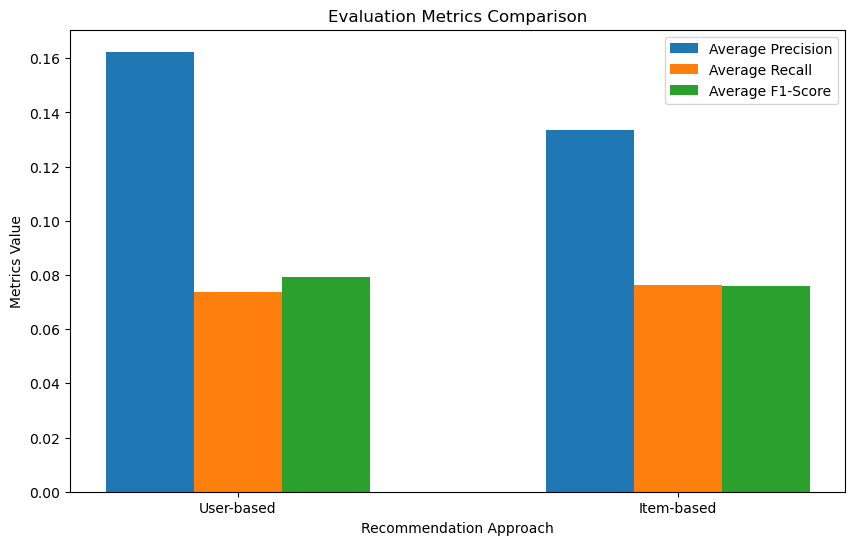

In [85]:
import matplotlib.pyplot as plt

# Extract metrics from overall_results dictionary
metrics = list(overall_results.keys())
avg_precision = [overall_results[method]['Average Precision'] for method in metrics]
avg_recall = [overall_results[method]['Average Recall'] for method in metrics]
avg_f1_score = [overall_results[method]['Average F1-Score'] for method in metrics]

# Plotting
x = range(len(metrics))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x, avg_precision, width, label='Average Precision')
plt.bar([i + width for i in x], avg_recall, width, label='Average Recall')
plt.bar([i + 2*width for i in x], avg_f1_score, width, label='Average F1-Score')

plt.xlabel('Recommendation Approach')
plt.ylabel('Metrics Value')
plt.title('Evaluation Metrics Comparison')
plt.xticks([i + width for i in x], metrics)
plt.legend()
plt.show()
